In [1]:
# --- Import libraries ---
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# --- Load your dataset ---
df = pd.read_csv("data/PSEN1_Sun.csv")

# --- Define columns ---
mutation_col = "Mutation"
aao_col = "AAO"              # Mean age of onset
ab40_col = "Amount of Ab40"
sd40_col = "SD of Ab40"
ab42_col = "Amount of Ab42"
sd42_col = "SD of Ab42"

In [9]:
# --- Calculate total amount of Aβ40 + Aβ42 ---
df["Total_Ab40_Ab42"] = df[ab40_col] + df[ab42_col]
df["Total_SD"] = (df[sd40_col]**2 + df[sd42_col]**2) ** 0.5  # Combine SDs quadratically

In [10]:
# --- Select specific mutations ---
selected_mutations = ["A246E", "I229F", "V272A"]  # change or add any you want
filtered_df = df[df["Mutation"].isin(selected_mutations)]

# --- Check selected data ---
print(filtered_df)

             Variants Mutation   AAO  Total Activity  SD of Total Activity  \
58  PSEN1:p.Ile229Phe    I229F  33.0           0.376                 0.055   
70  PSEN1:p.Ala246Glu    A246E  52.5           0.057                 0.001   
83  PSEN1:p.Val272Ala    V272A  32.9           1.108                 0.231   

    Ab42/Ab40 ratio  SD of ratio  Amount of Ab40  SD of Ab40  Amount of Ab42  \
58            3.328        0.306           0.346       0.030           1.168   
70            6.814        0.224           0.010       0.001           0.071   
83            5.358        0.549           0.885       0.082           4.757   

    ...  fathmm-XF_coding_rankscore fathmm-XF_coding_pred Eigen-raw_coding  \
58  ...                     0.94134                     D         0.956109   
70  ...                     0.64997                     D         0.719433   
83  ...                     0.90443                     D         0.974813   

   Eigen-raw_coding_rankscore Eigen-phred_coding  Eig

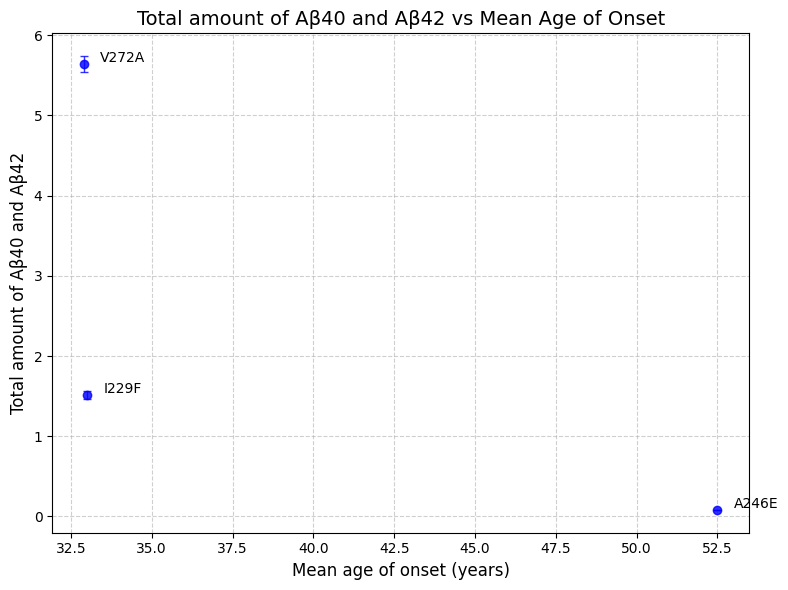

In [12]:
# --- Scatter plot with error bars ---
plt.figure(figsize=(8,6))
plt.errorbar(
    filtered_df["AAO"],
    filtered_df["Total_Ab40_Ab42"],
    yerr=filtered_df["Total_SD"],
    fmt='o',
    color='blue',
    ecolor='blue',
    elinewidth=1,
    capsize=3,
    alpha=0.8
)

# --- Add mutation labels ---
for _, row in filtered_df.iterrows():
    plt.text(
        row["AAO"] + 0.5,                     # horizontal offset
        row["Total_Ab40_Ab42"] + 0.02,        # vertical offset
        row["Mutation"], 
        fontsize=10, 
        color='black'
    )

# --- Customize plot ---
plt.title("Total amount of Aβ40 and Aβ42 vs Mean Age of Onset", fontsize=14)
plt.xlabel("Mean age of onset (years)", fontsize=12)
plt.ylabel("Total amount of Aβ40 and Aβ42", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

In [5]:
# # --- Save and show plot ---
# plt.tight_layout()
# plt.savefig("Ab40_Ab42_vs_AAO.png", dpi=300)
# plt.show()